In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Método de Newmark

Em 1959, N.M. Newmark desenvolveu uma família de métodos temporáis baseados nas seguintes equações:

\begin{align}
\dot{u}_{i+1} &= \dot{u}_i + [(1-\gamma)\Delta t]\ddot{u}_i + (\gamma \Delta t)\ddot{u}_{i+1}\\
u_{i+1} &= u_i +\Delta t\dot{u}_i + [(0.5-\beta)\Delta t^2]\ddot{u}_i + (\beta \Delta t^2)\ddot{u}_{i+1}
\end{align}

Os parâmetros $\beta$ e $\gamma$ definem a variação de aceleração em cada passo temporal e determinam a estabilidade e precisão do método. Para essa análise, será utilizado o método da aceleração média constante, em que  $\beta$ e $\gamma$ recebem, respectivamente, 0.25 e 0.5. O resumo do método da aceleração média pode ser visualizado na figura abaixo.

![Método da aceleração média constante](Resources\CAA.PNG)

No caso de sistemas lineares, a equação de equilíbrio dinâmico pode ser escrita por:
\begin{align}
m \ddot{u}_{i+1} + c\dot{u}_{i+1} + ku+{i+1} = p_{i+1}
\end{align}

A partir da equação 2, pode-se escrever a aceleração em função do deslocamento.
\begin{align}
\ddot{u}_{i+1} =\frac{1}{\beta\Delta t^2}\left(u_{i+1}-u_i\right) - \frac{1}{\beta\Delta t}\dot{u}_i +\left(\frac{1}{2\beta}-1\right)\ddot{u}_i
\end{align}

E a partir da equação 1, escreve-se a velocidade:
\begin{align}
\dot{u}_{i+1} =\frac{1}{\beta\Delta t}\left(u_{i+1}-u_i\right) + \left(1-\frac{\gamma}{\beta}\right)\dot{u}_i + \Delta t \left(1-\frac{\gamma}{2\beta}\right)\ddot{u}_i
\end{align}

Substituindo estes valores na equação de equilíbrio dinâmico, é possível a determinação de um sistema estático equivalente, escrito por:

\begin{align}
\hat{k} u_{i+1} = \hat{p}_{i+1}
\end{align}

em que:
\begin{align}
\hat{k}_{i+1} &= k + a_1\\
\hat{p}_{i+1} &= p_{i+1} + a_1u_i + a_2\dot{u}_i + a_3\ddot{u}_i
\end{align}

E as constantes a1,a2 e a3 são definidas como:
\begin{align}
a_1 &= \frac{1}{\beta \Delta t^2}m + \frac{\gamma}{\beta \Delta t}c\\
a_2 &= \frac{1}{\beta\Delta t}m + \left(\frac{\gamma}{\beta}-1 \right)c\\
a_3 &= \left(\frac{1}{2\beta} -1 \right) m + \Delta t \left( \frac{\gamma}{2\beta-1} \right)c 
\end{align}


## 2. Método de Newton-Raphson
Deixando de lado os termos relativos a inércia e ao amortecimento, teremos a seguinte equação não-linear para resolver:
\begin{align}
f_s(u) = p
\end{align}

Supondo que após $j$ ciclos de iteração, $u^{(j)}$ é uma estimativa do deslocamento que se quer descobrir e que o objetivo do processo é a determinação de um processo iterativo que possa produzir uma estimativa mais aproximada de $u^{(j+1)}$. Para isso, expande-se a força restitutiva a partir de uma série de Taylor.
\begin{align}
f_s^{(j+1)} = f_s^{(j)} + \frac{\partial f_s}{\partial u} \left( u^{(j+1)}-u^{(j)} \right) + \frac{1}{2}\frac{\partial^2 f_s}{\partial^2 u} \left( u^{(j+1)}-u^{(j)} \right)^2 +...
\end{align}

Tendo em vista que a variação de deslocamento tende a ser pequena para que o sistema possa convergir, utiliza-se a forma linearizada da equação acima.

\begin{align}
f_s^{(j+1)} &= f_s^{(j)} + \frac{\partial f_s}{\partial u} \left( u^{(j+1)}-u^{(j)} \right) = f_s^{(j)} + k^{(j)}_t \Delta u^{(j)} = p\\
k^{(j)}_t \Delta u^{(j)} &= p - f_s^{(j)} = R^{(j)}
\end{align}

Em que R é a função resíduo a qual deve ser minimizada e $k_t$ é a rigidez tangente. Resolvendo a equação linearizada, pode-se calcular o novo deslocamento.

\begin{align}
u^{(j+2)} = u^{(j+1)}\Delta u^{(j)} 
\end{align}

O processo deve ser repetido até que o critério de convergência seja atingindo. Este critério pode ser atendido com base na função residual, na variação de deslocamento ou do trabalho externo aplicado na iteração. O processo adotado neste notebook consiste em minimizar a função resíduo até que esta seja menor que o erro estabelecido, como mostra a figura abaixo.
![Newton-Raphson](Resources\Newton-Raphson.PNG)

##  3. Algorítmo de Newmark com Newton-Raphson


### 1.0 Cálculos iniciais

#### 1.1 Determinação dos valores iniciais de $f_s$ e $k_{t0}$

#### 1.2 Determinar a aceleração inicial 
\begin{align*}
\ddot{u_0} = \frac{p_0-c\dot{u_0} - f_{s0}}{m}
\end{align*}
#### 1.3 Determinar o passo temporal

#### 1.4 Determinação das constantes com base nas características físicas do sistema:
\begin{align*}
a_1 &= \frac{1}{\beta \Delta t^2}m + \frac{\gamma}{\beta \Delta t}c\\ 
a_2 &= \frac{1}{\beta\Delta t}m + \left(\frac{\gamma}{\beta}-1 \right)c\\
a_3 &= \left(\frac{1}{2\beta} -1 \right) m + \Delta t \left( \frac{\gamma}{2\beta-1} \right)c\\ 
\end{align*}
### 2.0 Início do cálculo no domínio do tempo

#### 2.1 Atualizar variáveis no início do loop.
\begin{align*}
u_{i+1} &= u_i\\
fs_{i+1} &= fs_i\\
kt_{i+1} &= kt_i\\
\end{align*}
#### 2.2 Calculo da força equivalente
\begin{align*}
 \hat{p}_{i+1} = p_{i+1} + a_1u_i +a_2\dot{u}_i + a_3\ddot{u}_i. 
\end{align*}
### 3.0 Início da iteração de Newton-Raphson:

#### 3.1  Determinação do resíduo.
\begin{align*}
 \hat{R}_{i+1} = \hat{p}_{i+1} - fs_{i+1} - a_1u{i+1} 
\end{align*}
#### 3.2 Verificar a convergência de acordo com o erro estipulado

#### 3.3 Calcular a Matriz de rigidedz tangente equivalente
\begin{align*}
 \hat{k}t_{i+1} = {kt}_{i+1} + a_1 
\end{align*}
#### 3.4 Resolver o sistema de equações para o cálculo da variação de deslocamento
\begin{align*}
 \Delta u =  \frac{\hat{R}_{i+1}}{\hat{k}t_{i+1}} 
\end{align*}
#### 3.5 Cálcular o novo vetor deslocamento
\begin{align*}
 u_{i+1} = u_{i+1} + \Delta u 
\end{align*}
#### 3.6 Determinação do estado com base no novo deslocamento.

### 4.0 Cálculo da velocidade e da aceleração

#### 4.1 Cálculo da velocidade no instante $i+1$
\begin{align*}
 \dot{u}_{i+1} = \frac{\gamma}{\beta \Delta t}(u_{i+1}-u_i) + \left( 1 - \frac{\gamma}{\beta} \right) \dot{u}_i + \Delta t \left(1-\frac{\gamma}{2\beta}\right)\ddot{u}_i. 
\end{align*}
#### 4.2 Cálculo da aceleração no instante $i+1$
\begin{align*}
 \ddot{u}_{i+1} = \frac{\gamma}{\beta \Delta t^2}(u_{i+1}-u_i) - \frac{1}{\beta\Delta t}\dot{u}_i - \left( \frac{1}{2\beta}-1 \right) \ddot{u}_i. 
\end{align*}
#### Repetem-se os itens 2 a 4.

A diferença entre o método linear e o não-linear consiste na aplicação do método de Newton-Raphson para realizar a convergência do sistema estático equivalente.






## 2. Validação do método para um sistema com 1gdl 

Para a validação dos códigos utilizados, resolve-se o Exemplo 5.5 De Chopra(2011). O modelo constitutivo utilizado pelo autor está exposto abaixo e os dados para a solução do problema são: m = 0.2533, c = 0.1592 e $\Delta t = 0.1$.

![Modelo constitutivo ex5](Resources\const_5.PNG)

O carregamento externo aplicado ao sistema é exposto na célula abaixo.

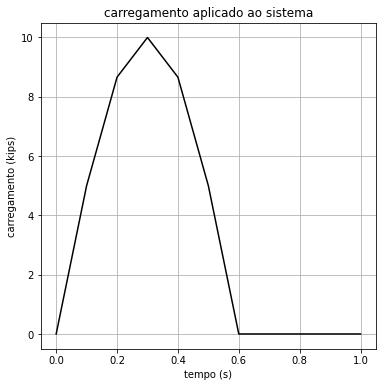

In [2]:
t = np.linspace(0,1,11)
p = 10*np.sin(np.pi*t/0.6)
p[6:11] = 0
plt.figure(1,figsize=(6,6))
plt.plot(t,p,'k')
plt.title('carregamento aplicado ao sistema')
plt.xlabel('tempo (s)')
plt.ylabel('carregamento (kips)')
plt.grid(True)

O modelo constitutivo empregado no problema será descrito na função 'Func'. Na solução do problema, o autor desconsidera o processo de descarga, portanto, será definida uma função simplificada.

In [3]:
def func(u):
    umax = 0.75
    fsmax = 7.5
    
    if u <= umax:
        kt = 10
        fs = 10*u
    else:
        kt = 0
        fs = fsmax
        
    return kt,fs


Agora, pode-se definir a função responsável pela solução da equação de equilíbrio dinâmico.

In [4]:
def NLNewmark(k,m,c,p,u0,v0,t,e):

# 0.0 iniciando os parâmetros

    nt = int(len(t))
    a  = np.zeros(nt)
    v  = np.zeros(nt)
    u  = np.zeros(nt)
    fs = np.zeros(nt)
    kt = np.zeros(nt)
    kht = np.zeros(nt)
    ph = np.zeros(nt)
    R = np.zeros(nt)
    
#1.0 Determinação dos parâmetros iniciais:
    b = 0.25
    y = 0.50

#1.1 passo temporal

    dt = t[1] - t[0]
    
#1.2 variáveis de estado    
    kt[0] = k
    fs[0] = k * u[0] 
    
#1.3 cálculo da aceleração inicial:

    a[0] = (p[0] - c*v[0] - fs[0])/m
            
# 1.4 Determinação das consntantes:
            
    a1 = 1/(b*dt**2)*m + y/(b*dt)*c
            
    a2 = 1/(b*dt)*m + (y/b -1)*c
            
    a3 = (1/(2*b)-1)*m + dt*(y/(2*b)-1)*c
      
#2.0 início da iteração temporal
    for i in range(nt-1):
# 2.1 iniciação dos valores
            
            u[i+1] = u[i]
            fs[i+1] = fs[i]
            kt[i+1] = kt[i]
            
# 2.2 Cálculo da força equivalente 
            ph[i+1] = p[i+1] + a1*u[i] + a2*v[i] + a3*a[i]
            
# 3.0 início da iteração de Newton-Raphson
            
            k = 0
            while k<1:

                R[i+1] = ph[i+1] - fs[i+1] -a1*u[i+1]
                
                if abs(R[i+1]) <= e:
                    k = 1
                else:
                    
                    kht[i+1] = kt[i+1] + a1
                
                    du = R[i+1]/kht[i+1]
            
                    u[i+1] += du
            
                    kt[i+1],fs[i+1] = func(u[i+1])

# 4.0 Determinação da velocidade e da aceleração

            v[i+1] = y/(b*dt)*(u[i+1] - u[i]) + (1-y/b)*v[i] + dt*(1-y/(2*b))*a[i]
            
            a[i+1] = 1/(b*dt**2)*(u[i+1] - u[i]) - 1/(b*dt)*v[i] - (1/(2*b) - 1)*a[i]
            
    return u,v,a,kt,fs,R
                    
        

In [5]:
# Dados de entrada
k = 10
m = 0.2533
c = 0.1592
t = np.linspace(0,1,11)
u0 = 0
v0 = 0
e = 0.01

# Resolução da equação de equilíbrio

u,v,a,kt,fs,R = NLNewmark(k,m,c,p,u0,v0,t,e)

#Plotagem dos resultados

data = {'p_i':p[0:7],'R_i':R[0:7],'Kt':kt[0:7],'u':u[0:7],'fs':fs[0:7],'v':v[0:7],'a':a[0:7]}
Plan = pd.DataFrame( data = data,
                   index = t[0:7]) 
Plan

,p_i,R_i,Kt,u,fs,v,a
0.0,0.000000,0.000000e+00,10.0,0.000000,0.000000,0.000000,0.000000
0.1,5.000000,0.000000e+00,10.0,0.043667,0.436666,0.873332,17.466639
0.2,8.660254,0.000000e+00,10.0,0.232617,2.326165,2.905666,23.180051
0.3,10.000000,-7.105427e-15,10.0,0.612063,6.120630,4.683262,12.371871
0.4,8.660254,0.000000e+00,0.0,1.114345,7.500000,5.362370,1.210283
0.5,5.000000,-2.842171e-14,0.0,1.621424,7.500000,4.779211,-12.873472
0.6,0.000000,0.000000e+00,0.0,1.989093,7.500000,2.574185,-31.227044


Comparando estes valores aos encontrados no livro, percebe-se que o algorítmo está funcionando correntamente.

![Resultados do ex5](Resources\R05.PNG)

## 2. Validação do método para um sistema com Múltiplos gdl 

Para a validação dos códigos utilizados, resolve-se o Exemplo16.4 de Chopra(2011). O modelo constitutivo utilizado pelo autor está exposto abaixo, junto do Shear Building considerado e suas respectivas matrizes. Os dados utilizados no problema são: m = 0.2591, k = 100, $\alpha$ = 0.05, $\ddot{u}_{g0}$ = 193.05

![Modelo constitutivo ex16](Resources\Dados16.PNG)

A função para a resolução da equação de equilíbrio dinâmico é exposta abaixo.

In [10]:
def NLNewmarkM(k,m,c,p,u0,v0,t,e):

# 0.0 iniciando os parâmetros

    nt  = int(len(t))
    n   = int(len(p[:,0]))
    a   = np.zeros((n,nt))
    v   = np.zeros((n,nt))
    u   = np.zeros((n,nt))
    fs  = np.zeros((n,nt))
    kt  = np.zeros((nt,n,n))
    kht = np.zeros((nt,n,n))
    ph  = np.zeros((n,nt))
    R   = np.zeros((n,nt))
    
#1.0 Determinação dos parâmetros iniciais:
    b = 0.25
    y = 0.50

#1.1 passo temporal

    dt = t[1] - t[0]
    
#1.2 variáveis de estado    
    kt[0] = k
    fs[:,0] = np.dot(kt[0],u[:,0]) 
    
#1.3 cálculo da aceleração inicial:

    a[:,0] = np.linalg.inv(m)@(p[:,0] - c@v[:,0] - fs[:,0])
            
# 1.4 Determinação das consntantes:
            
    a1 = 1/(b*dt**2)*m + y/(b*dt)*c
            
    a2 = 1/(b*dt)*m + (y/b -1)*c
            
    a3 = (1/(2*b)-1)*m + dt*(y/(2*b)-1)*c
    
#2.0 início da iteração temporal
    for i in range(nt-1):
# 2.1 iniciação dos valores
            
            u[:,i+1]  = u[:,i]
            fs[:,i+1] = fs[:,i]
            kt[i+1]   = kt[i]

# 2.2 Cálculo da força equivalente 

            ph[:,i+1] = p[:,i+1] + a1@u[:,i] + a2@v[:,i] + a3@a[:,i]
            
# 3.0 início da iteração de Newton-Raphson
            j = 0
            
            while True:

                R[:,i+1] = ph[:,i+1] - fs[:,i+1] - a1@u[:,i+1]
                
                j+=1
                
                if j>5000:
                    
                    print('erro: não converge na iteração',i)
                    break
                    
                if np.linalg.norm(R[:,i+1]) <= e:
                    
                    break
                    print('Numero de iterações:',j)
                else:
                    
                    kht[i+1] = kt[i+1] + a1
                
                    du = np.linalg.inv(kht[i+1])@R[:,i+1]
                    
                    u[:,i+1] += du
                    
                    kt[i+1],fs[:,i+1] =func2(u[:,i+1])
                    
                    #kt[i+1] = kt[i]
                    #fs[:,i+1] = np.dot(kt[i+1],u[:,i+1])

# 4.0 Determinação da velocidade e da aceleração

            v[:,i+1] = y/(b*dt)*(u[:,i+1] - u[:,i]) + (1-y/b)*v[:,i] + dt*(1-y/(2*b))*a[:,i]
            
            a[:,i+1] = 1/(b*dt**2)*(u[:,i+1] - u[:,i]) - 1/(b*dt)*v[:,i] - (1/(2*b) - 1)*a[:,i]
            
    return u.round(4),v,a,kt,fs,R
                

A definição do modelo constitutivo empregado no exemplo é feito pela função func2.

In [11]:
def func2(U):
    sd = np.zeros(5)
    fd = np.zeros(5)
    Fd = np.zeros(5)
    k = np.zeros(5)
    
#1.0 Cálculo do Story drift
    sd[0] = U[0]
    for i in range(1,5):
        sd[i] = U[i] - U[i-1]
#2.0 Determinação do estado    
    for i in range(5):
                   
        if abs(sd[i])<=1.25:
            k[i] = 100
            fd[i] = k[i]*sd[i]
        else:
            
            k[i] = 5
            fd[i] = np.sign(sd[i])*(125 + k[i]*(abs(sd[i])-1.25))
            
#3.0 Montagem da Matriz de rigidez 

    K = np.array([[k[0]+k[1],-1*k[1],0,0,0],
                 [-1*k[1],k[1]+k[2],-1*k[2],0,0],
                 [0,-1*k[2],k[2]+k[3],-1*k[3],0],
                 [0,0,-1*k[3],k[3]+k[4],-1*k[4]],
                 [0,0,0,-1*k[4],1*k[4]]])
    
#4.0 Montagem do vetor de forças 
    Fd[4] = fd[4]
    
    for i in range(4):
        Fd[i] = fd[i]-fd[i+1]
        
    return K,Fd


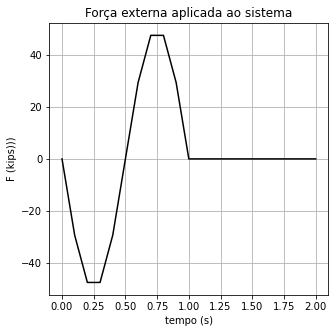

In [12]:
#1.0 Valores iniciais do problema
e = 0.00010
t = np.linspace(0,2,21)
k = 100
u0 = v0 = np.zeros(5)
K = k* np.array([[2,-1,0,0,0],
                 [-1,2,-1,0,0],
                 [0,-1,2,-1,0],
                 [0,0,-1,2,-1],
                 [0,0,0,-1,1]])

M = 0.2591* np.diag(np.ones(5))

C= 0.01* np.array([[69.01,-19.81,-3.395,-1.37,-0.873],
                 [-19.81,65.7,-21.18,-4.268,-2.243],
                 [-3.395,-21.18,64.83,-22.05,-5.638],
                 [-1.37,-4.268,-22.05,63.46,-25.45],
                 [-0.873,-2.243,-5.638,-25.45,43.65]])

#2.0 Calculo do vetor de forças

ug = np.zeros((1,21))
ug[0] =0.5*386.1*np.sin(2*np.pi*t)
ug[0,10:21] =np.zeros(11)
P = -M@np.ones((5,1))
P = np.dot(P.round(4),ug)

#2.1 Plotagem do vetor de forças
plt.figure(1,figsize =(5,5))
plt.plot(t,P[0],'k')
plt.title('Força externa aplicada ao sistema')
plt.xlabel('tempo (s)')
plt.ylabel('F (kips)))')
plt.grid(True)

# 3.0 Resolução do sistema pelo método de Newmark e Newton-Raphson

u,v,a,kt,fs,R = NLNewmarkM(K,M,C,P,u0,v0,t,e)



In [13]:
#4.0 Visualização dos valores de deslocamento
data2 = {'t_i':t[0:7], 'P_i':P[0,0:7],'u_1':u[0,0:7],'u_2':u[1,0:7],
         'u_3':u[2,0:7],'u_4':u[3,0:7],'u_5':u[4,0:7]}
Plan2 = pd.DataFrame( data = data2,
                   index = np.linspace(0,6,7))
Plan2

,t_i,P_i,u_1,u_2,u_3,u_4,u_5
0.0,0.0,-0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000
1.0,0.1,-2.940058e+01,-0.1709,-0.2360,-0.2614,-0.2712,-0.2747
2.0,0.2,-4.757114e+01,-0.7704,-1.1766,-1.3754,-1.4667,-1.5020
3.0,0.3,-4.757114e+01,-1.8817,-2.8984,-3.5526,-3.9166,-4.0749
4.0,0.4,-2.940058e+01,-3.5367,-5.1288,-6.2627,-7.0497,-7.4407
5.0,0.5,-6.125592e-15,-5.3871,-7.5191,-8.7166,-9.6944,-10.2428
6.0,0.6,2.940058e+01,-6.4492,-9.0772,-10.0545,-10.7605,-11.1581


Comparando estes valores aos encontrados no livro, percebe-se que o algorítmo está funcionando correntamente.

![Resultados do ex5](Resources\R16.PNG)